<a href="https://colab.research.google.com/github/sneha-315/Sentiment-Analysis/blob/main/Sentiment_Analysis_Sneha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!gdown --id 1wObfz33pLg8oSVbz8kOMS7zepsFw71kE
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wObfz33pLg8oSVbz8kOMS7zepsFw71kE
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 237kB/s]


In [ ]:
!kaggle datasets download -d kazanova/sentiment140


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other


In [ ]:
!unzip sentiment140 -d '/content/sentiment140'

Archive:  sentiment140.zip
  inflating: /content/sentiment140/training.1600000.processed.noemoticon.csv  


In [ ]:
filepath = "/content/sentiment140"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing regular expressions and string
import re
import string


import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#nltk - natural language tool kit
#for preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def load_dataset(filepath, cols):
  df = pd.read_csv(filepath, encoding = 'latin-1', header = None)
  df.columns = cols

  return df


df = load_dataset('/content/sentiment140/training.1600000.processed.noemoticon.csv',['sentiment', 'id', 'date', 'query', 'user_id', 'text'])
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
def delete_reduntant_cols(df, cols):
  for col in cols:
    del df[col]
  return df


df = delete_reduntant_cols(df, ['id', 'date', 'query', 'user_id'])
df.head()


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

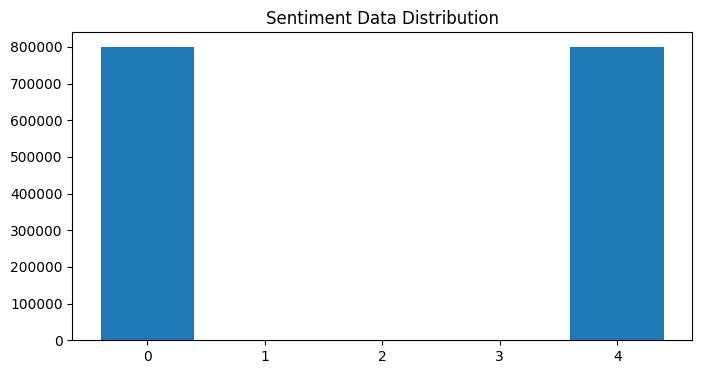

In [10]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")


In [11]:
#Removing StopWords
stop_words = stopwords.words('english')

# for stemming we are using SnowballStemmer here
stemmer = SnowballStemmer('english')

# we are using WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# for removing urls, punctuations, user tag @ references and '#' from tweet
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


def preprocess(text, stem=False):
  #performing Casing
  #converting all the letters into lowercase letters
  text = str(text).lower()

  #Noise removal
  text = re.sub(text_cleaning_re, ' ', text).strip()

  #remove stopwords, stemming and lemmatizing
  tokens = []
  for token in text.split():
    if len(token)>1:
      # Lemmatizing the word.
      token = lemmatizer.lemmatize(token)

    #removing stopwords
    if token not in stop_words:

      #applying stemming
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)


df.text = df.text.apply(lambda x: preprocess(x))
df.head()


,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many time ball managed save 50 rest go b...
3,0,whole body feel itchy like fire
4,0,behaving mad see


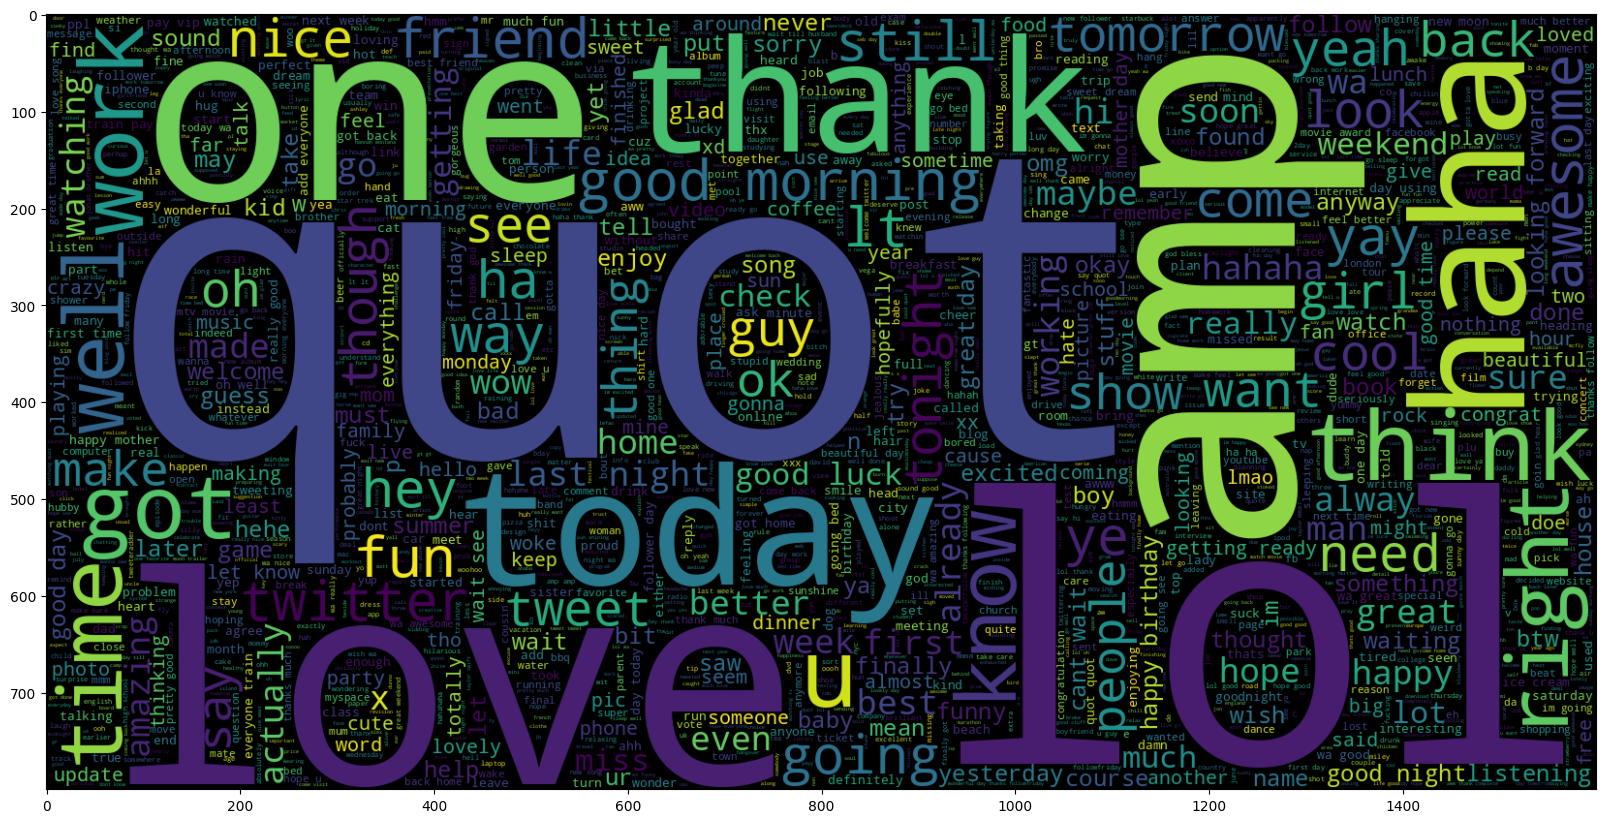

In [13]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 4].text))
plt.imshow(wc , interpolation = 'bilinear')

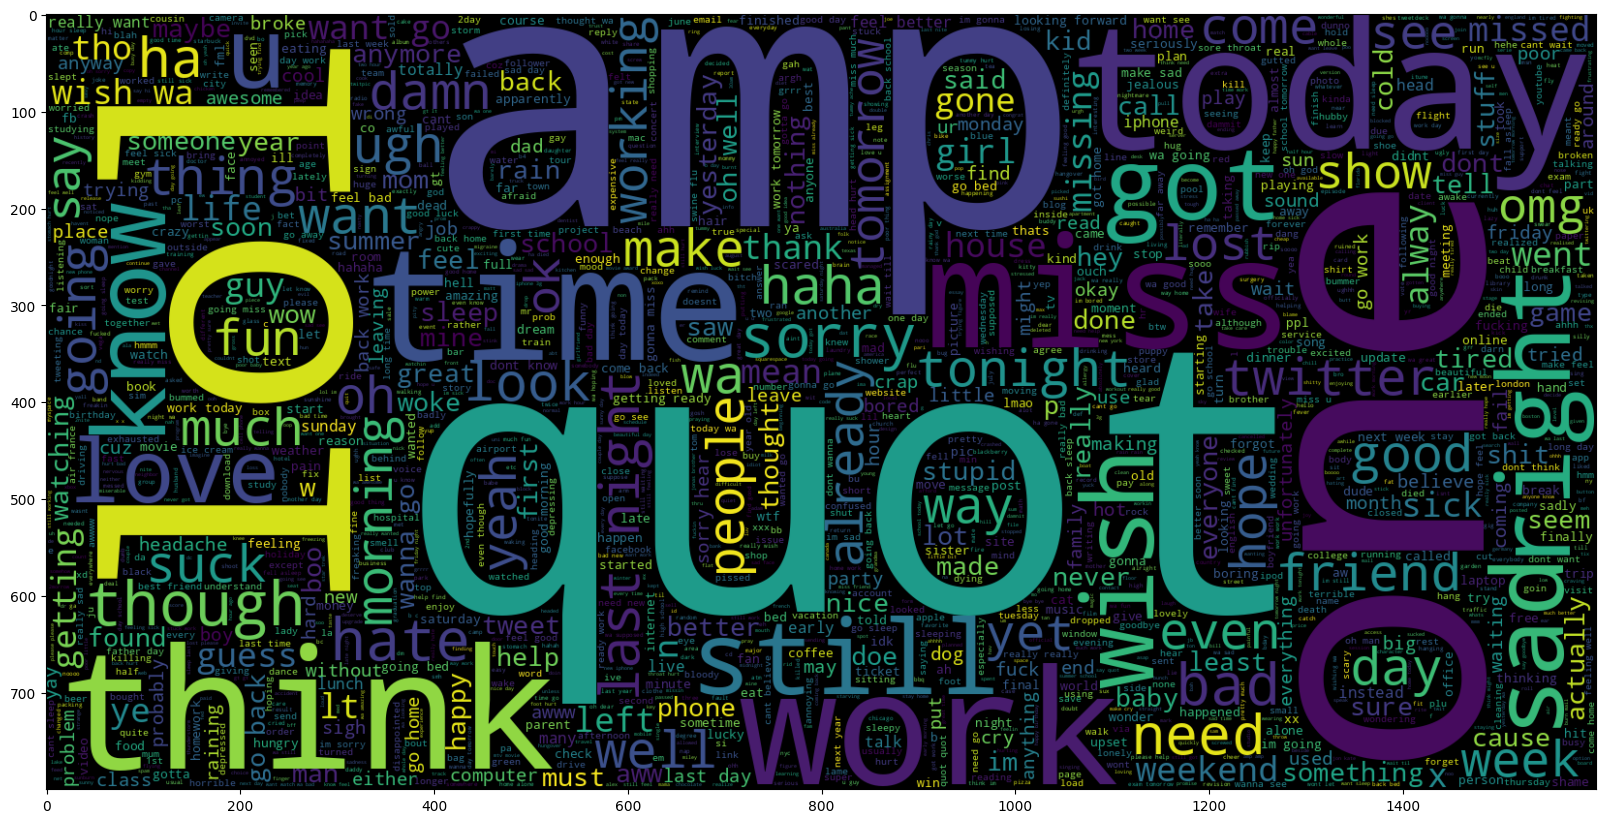

In [14]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].text))
plt.imshow(wc , interpolation = 'bilinear')


In [15]:
TRAIN_SIZE = 0.8


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df, df.sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [17]:
X_train.head()


,sentiment,text
391051,0,working double texas roadhouse
197655,0,envy everyone thats working today l nice day
905468,4,hehe thanks everyone class laughing
1492339,4,woot woot haha gonna go movie uncle iphone
551346,0,pissed ha use crappy phone til get new one
